In [ ]:
import pandas as pd 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re,string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.manifold import MDS


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

import pandas as pd
import os

from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora


from gensim.models.doc2vec import Doc2Vec, TaggedDocument


import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
pip install -U nltk[all]

     |████████████████████████████████| 1.4MB 5.6MB/s 
     |████████████████████████████████| 747kB 26.7MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434677 sha256=ef2902bd12cd03ed7e631c56409fb500cb7ae5f1566574fc330e26966ea26d9c
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

In [ ]:
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
fed_speeches = pd.read_csv('fed_speeches_1996_2020 (2).csv')
fed_speeches_bernanke = pd.read_csv('fed_speeches_bernanke.csv')
fed_speeches_greenspan = pd.read_csv('fed_speeches_greenspan.csv')
fed_speeches_yellen = pd.read_csv('fed_speeches_yellen.csv')
fed_speeches_powell = pd.read_csv('fed_speeches_powell.csv')
fed_speeches_90s = pd.read_csv('fed_speeches_90s.csv')
fed_speeches_00s = pd.read_csv('fed_speeches_00s.csv')
fed_speeches_10s = pd.read_csv('fed_speeches_10s.csv')

In [ ]:
def remove_stopwords(sentence):
    words = sentence.split()
    words = [word for word in words if word not in stopwords.words('english')]
    
    return ' '.join(words)


stemmer = SnowballStemmer('english')
def stem_words(x):
    return stemmer.stem(x)
    
def remove_non_alphabet(x):
    return ' '.join([i for i in x.split() if i.isalpha()])

def remove_punctuation(x):
    return x.translate(str.maketrans('', '', string.punctuation))
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

import re
contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(s, contractions = contractions):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, s)

lemmatizer = WordNetLemmatizer()
def lemmatize_words_verb(x):
    return lemmatizer.lemmatize(x, 'v')

lemmatizer = WordNetLemmatizer()
def lemmatize_words_noun(x):
    return lemmatizer.lemmatize(x, 'n')

def lowercase(text):
    text = text.lower()
    return text


def remove_punctuations(text):
    text = re.sub(r'[^\w\s]','',text)
    return text

def One_Hot(variable):
    LE=LabelEncoder()
    LE.fit(variable)
    Label1=LE.transform(variable)
    OHE=OneHotEncoder()
    labels=OHE.fit_transform(Label1.reshape(-1,1)).toarray()
    return labels, LE, OHE

def clean_doc(doc): 
    #split document into individual words
    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub(' ', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]         
    # word stemming    
    #stemmer = SnowballStemmer('english')
    #tokens=[stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, 'n') for word in tokens]
    tokens = [lemmatizer.lemmatize(word, 'v') for word in tokens]
    contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
    def replace(match):
        return contractions[match.group(0)]
    tokens = [contractions_re.sub(replace, word) for word in tokens]
    return tokens

In [ ]:
#create empty list to store text documents titles
titles=[]

#for loop which appends the DSI title to the titles list
for i in range(0,len(fed_speeches)):
    temp_text=fed_speeches['title'].iloc[i]
    titles.append(temp_text)

#create empty list to store text documents
text_body=[]

#for loop which appends the text to the text_body list
for i in range(0,len(fed_speeches)):
    temp_text=fed_speeches['text'].iloc[i]
    text_body.append(temp_text)

#Note: the text_body is the unprocessed list of documents read directly form 
#the csv.
    
#empty list to store processed documents
processed_text=[]
#for loop to process the text to the processed_text list
for i in text_body:
    text=clean_doc(i)
    processed_text.append(text)

#Note: the processed_text is the PROCESSED list of documents read directly form 
#the csv.  Note the list of words is separated by commas.


#stitch back together individual words to reform body of text
final_processed_text=[]

for i in processed_text:
    temp_DSI=i[0]
    for k in range(1,len(i)):
        temp_DSI=temp_DSI+' '+i[k]
    final_processed_text.append(temp_DSI)

In [ ]:
def create_ec(dictionary, corpus):
    for key, values in dictionary.items():
        for value in values:
            corpus= corpus.replace(value, key)
    return corpus

education_dic={'education': ['skill', 'school', 'university', 'college', 
                             'train', 'literacy', 'outreach', 'teach', 'research', 'educational', 
                             'student', 'graduate', 'vocational']}
ip_dic = {'intellectual property': ['reagan', 'protection']}
tech_dic = {'technology': ['electronic', 'payment', 'digital', 'technological', 'computer', 
                           'advance', 'telecommunication', 'computerization', 'innovation']}
trade_dic = {'trade': ['china', 'globalization', 'export', 'deficit', 'emerge', 
                       'global', 'antidumping', 'import', 'asian', 'surplus']}
energy_dic = {'energy': ['oil', 'gas', 'crude', 'barrel', 'natural', 'drill', 
                         'gasoline', 'energyoline', 'energydid']}
reg_dic = {'regulation':['supervision', 'basel', 'supervisory', 'hedge', 'clearinghouses', 
                         'prudential', 'supervisor', 'regulator', 'oversight', 'supervise']}
currency_dic = {'currency': ['circulation', 'note', 'counterfeit', 'tender', 
                             'euro', 'fiat', 'denominate']}
crisis_dic = {'crisis': ['cdc', 'breakdown', 'problem', 'readiness', 'century', 'recession', 
                          'challenging', 'stress', 'stability', 'recovery', 
                          'coronavirus', 'pandemic', 'virus', 'depressionthe', 'depression', 
                         ]}
community_dic = {'community': ['cra', 'cdfis', 'cdfi', 'development', 'family', 'rural', 
                  'microfinance', 'mobility', 'local', 'small', 'creditworthy', 
                  'neighborhood', 'nonprofit', 'philanthropic', 'entrepreneurship']}
housing_dic = {'house': ['mortgage', 'home', 'household', 'debt', 'loan', 'homeowner', 
                           'refinance', 'subprime', 'foreclosure', 'delinquency', 'scf', 
                         'gse', 'rental', 'foreclose', 'residence']}
diversity_dic = {'diversity': ['minority', 'talf', 'minorityowned', 'woman','women', 
                               'participation', 'empowerment', 'hbcus']}
monpol_dic = {'monetary policy': ['inflation', 'employment', 'unemployment', 'growth', 
                                   'fomc', 'interest', 'liquidity', 'labor', 'elb', 
                                   'strategy', 'fiscal', 'phillips', 'budget', 'debt',
                                   'sustainability', 'macroeconomic']}
ret_dic = {'retirement': ['save', 'reitree', 'social']} 

happ_dic = {'happiness': ['satisfaction', 'wellbeing']}
ineq_dic = {'inequality': ['middle', 'workingage', 'middleclass', 'antipoverty']}




In [ ]:
final_processed_text_new = []
for i in range(len(final_processed_text)):
  new_text = create_ec(education_dic, final_processed_text[i])
  new_text = create_ec(ip_dic, new_text)
  new_text = create_ec(tech_dic, new_text)
  new_text = create_ec(trade_dic, new_text)
  new_text = create_ec(energy_dic, new_text)
  new_text = create_ec(reg_dic, new_text)
  new_text = create_ec(currency_dic, new_text)
  new_text = create_ec(crisis_dic, new_text)
  new_text = create_ec(community_dic, new_text)
  new_text = create_ec(housing_dic, new_text)
  new_text = create_ec(diversity_dic, new_text)
  new_text = create_ec(monpol_dic, new_text)
  new_text = create_ec(ineq_dic, new_text)
  new_text = create_ec(ret_dic, new_text)
  new_text = create_ec(happ_dic, new_text)
  final_processed_text_new.append(new_text)



In [ ]:
processed_text_new = []
for i in range(len(final_processed_text_new)):
  split_doc = final_processed_text_new[i].split()
  processed_text_new.append(split_doc)

In [ ]:
###############################################################################
### Sklearn TFIDF 
###############################################################################
#note the ngram_range will allow you to include multiple words within the TFIDF matrix
#Call Tfidf Vectorizer
Tfidf=TfidfVectorizer(ngram_range=(1,3))

#fit the vectorizer using final processed documents.  The vectorizer requires the 
#stiched back together document.

TFIDF_matrix=Tfidf.fit_transform(final_processed_text_new)     

#creating datafram from TFIDF Matrix
matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)



###############################################################################
### Explore TFIDF Values
###############################################################################

average_TFIDF={}
for i in matrix.columns:
    average_TFIDF[i]=np.mean(matrix[i])

average_TFIDF_DF=pd.DataFrame(average_TFIDF,index=[0]).transpose()

average_TFIDF_DF.columns=['TFIDF']

#calculate Q1 and Q3 range
Q1=np.percentile(average_TFIDF_DF, 25)
Q3=np.percentile(average_TFIDF_DF, 75)
IQR = Q3 - Q1
outlier=Q3+(1.5*IQR)


#words that exceed the Q3+IQR*1.5
outlier_list=average_TFIDF_DF[average_TFIDF_DF['TFIDF']>=outlier]


#can export matrix to csv and explore further if necessary

In [ ]:
average_TFIDF_DF.nlargest(50, 'TFIDF').index

Index(['policy', 'monetary', 'monetary policy', 'community', 'crisis', 'rate',
       'financial', 'economy', 'bank', 'economic', 'federal', 'education',
       'percent', 'market', 'return', 'text', 'reserve', 'return text', 'see',
       'year', 'feed', 'housing', 'low', 'work', 'policy rate',
       'community community', 'unmonetary', 'federal reserve',
       'unmonetary policy', 'trade', 'business', 'time', 'job', 'risk',
       'financial crisis', 'new', 'people', 'system', 'also', 'many', 'change',
       'monetary policy rate', 'support', 'diversity', 'figure', 'central',
       'help', 'energy', 'regulation', 'level'],
      dtype='object')

In [ ]:
###############################################################################
### Doc2Vec
###############################################################################
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text_new)]
model = Doc2Vec(documents, vector_size=20, window=2, min_count=1, workers=4)

doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text_new)):
    vector=pd.DataFrame(model.infer_vector(processed_text_new[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': titles}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([doc2vec_df,t], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)

###############################################################################
### Gensim Word2vec 
###############################################################################

#Note, there are opportunities to use the word2vec matrix to determine words 
#which are similar.  Similar words can be used to create equivalent classes.  
#k-means is not used to group individual words using the Word2Vec output.

#word to vec
model_w2v = Word2Vec(processed_text_new, size=100, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text_new:
    for k in i:
        processed_text_w2v.append(k)

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()


#the following section runs applies the k-means algorithm on the TFIDF matrix.

In [ ]:
processed_text_new

In [ ]:
model_w2v.similar_by_word('technology', topn=25)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('commercialize', 0.8564703464508057),
 ('new', 0.795226514339447),
 ('ageone', 0.7856429815292358),
 ('newer', 0.7683990001678467),
 ('unheralded', 0.7614873647689819),
 ('goad', 0.7395753860473633),
 ('complexityin', 0.7363630533218384),
 ('application', 0.7271515130996704),
 ('democommunitytization', 0.7177261114120483),
 ('vestibule', 0.71486496925354),
 ('process', 0.7125180959701538),
 ('technologys', 0.7090509533882141),
 ('radically', 0.7022255659103394),
 ('tone', 0.6999871730804443),
 ('rapidly', 0.6977400183677673),
 ('semiconductor', 0.6977198123931885),
 ('billers', 0.6961164474487305),
 ('breakthrough', 0.6900867819786072),
 ('steamship', 0.6875551342964172),
 ('traction', 0.68636554479599),
 ('genomics', 0.6860967874526978),
 ('realizable', 0.683902382850647),
 ('void', 0.6837989091873169),
 ('improvement', 0.683413565158844),
 ('expand', 0.6824454069137573)]

In [ ]:
###############################################################################
### K Means Clustering - TFIDF
###############################################################################
k=10
km = KMeans(n_clusters=k, random_state =69)
km.fit(TFIDF_matrix)
clusters = km.labels_.tolist()


terms = Tfidf.get_feature_names()
Dictionary={'Doc Name':titles, 'Cluster':clusters,  'Text': final_processed_text_new}
frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

print("Top terms per cluster:")
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

terms_dict=[]


#save the terms for each cluster and document to dictionaries.  To be used later
#for plotting output.

#dictionary to store terms and titles
cluster_terms={}
cluster_title={}


for i in range(k):
    print("Cluster %d:" % i),
    temp_terms=[]
    temp_titles=[]
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        terms_dict.append(terms[ind])
        temp_terms.append(terms[ind])
    cluster_terms[i]=temp_terms
    
    print("Cluster %d titles:" % i, end='')
    temp=frame[frame['Cluster']==i]
    for title in temp['Doc Name']:
        print(' %s,' % title, end='')
        temp_titles.append(title)
    cluster_title[i]=temp_titles

Top terms per cluster:
Cluster 0:
 house
 house house
 community
 financial
 credit
 market
 policy
 consumer
 rate
 federal
Cluster 0 titles: Chairman Alan Greenspan_U.S. Treasury securities market: Lessons from Alexander Hamilton, Chairman Alan Greenspan_Consumer credit and financial modernization, Chairman Alan Greenspan_Mortgage markets and economic activity, Chairman Alan Greenspan_Mortgage finance, Chairman Alan Greenspan_Opening remarks, Chairman Alan Greenspan_Economic development and financial literacy, Chairman Alan Greenspan_Home mortgage market, Chairman Alan Greenspan_The mortgage market and consumer debt, Chairman Alan Greenspan_Understanding household debt obligations, Chairman Alan Greenspan_Government-sponsored enterprises, Chairman Alan Greenspan_Consumer Finance, Chairman Ben S. Bernanke_Housing, Housing Finance, and Monetary Policy, Chairman Ben S. Bernanke_The Housing Market and Subprime Lending, Chairman Ben S. Bernanke_The Subprime Mortgage Market, Chairman Ben S

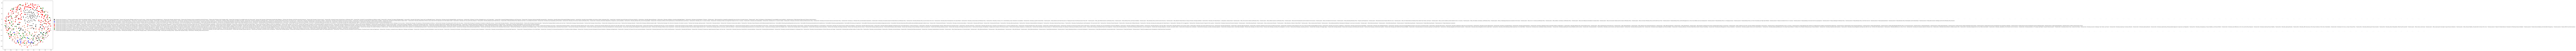

In [ ]:
###############################################################################
### Plotting
###############################################################################

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.


mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

dist = 1 - cosine_similarity(TFIDF_matrix)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]


#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick', 
                  5:'red', 6:'darksalmon', 7:'sienna', 8: 'green', 9:'pink'}


#set up cluster names using a dict.  
cluster_dict=cluster_title

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters)))) 

#group by cluster
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_dict[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))      #show legend with only 1 point



#The following section of code is to run the k-means algorithm on the doc2vec outputs.
#note the differences in document clusters compared to the TFIDF matrix.

In [ ]:
###############################################################################
### K Means Clustering Doc2Vec
###############################################################################
doc2vec_k_means=doc2vec_df.drop('title', axis=1)

k=10
km = KMeans(n_clusters=k, random_state =89)
km.fit(doc2vec_k_means)
clusters_d2v = km.labels_.tolist()

Dictionary={'Doc Name':titles, 'Cluster':clusters_d2v,  'Text': final_processed_text_new}
frame=pd.DataFrame(Dictionary, columns=['Cluster', 'Doc Name','Text'])

#dictionary to store clusters and respective titles
cluster_title={}

#note doc2vec clusters will not have individual words due to the vector representation
#is based on the entire document not indvidual words. As a result, there won't be individual
#word outputs from each cluster.   
for i in range(k):
    temp=frame[frame['Cluster']==i]
    temp_title_list=[]
    for title in temp['Doc Name']:
        temp_title_list.append(title)
    cluster_title[i]=temp_title_list

In [ ]:
cluster_title

{0: ['Chairman Alan Greenspan_U.S. Treasury securities market: Lessons from Alexander Hamilton',
  'Chairman Alan Greenspan_Education, technology, and economic growth',
  'Chairman Alan Greenspan_The embrace of free markets',
  'Chairman Alan Greenspan_The evolution of banking in a market economy',
  'Chairman Alan Greenspan_Is there a new economy?',
  'Chairman Alan Greenspan_On the announcement of a new currency design',
  "Chairman Alan Greenspan_Understanding today's international financial system",
  'Chairman Alan Greenspan_The ascendance of market capitalism',
  'Chairman Alan Greenspan_Risk management in the global financial system',
  'Chairman Alan Greenspan_The role of capital in optimal banking supervision and regulation',
  'Chairman Alan Greenspan_Information, productivity, and capital investment',
  'Chairman Alan Greenspan_Currency reserves and debt',
  'Chairman Alan Greenspan_Electronic finance',
  'Chairman Alan Greenspan_Banking supervision',
  'Chairman Alan Greens

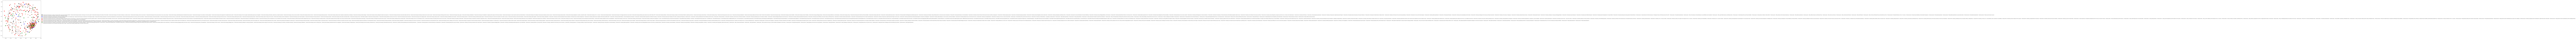

In [ ]:
###############################################################################
### Plotting Doc2vec
###############################################################################
# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.


mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

dist = 1 - cosine_similarity(doc2vec_k_means)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]


#set up colors per clusters using a dict.  number of colors must correspond to K
cluster_colors = {0: 'black', 1: 'grey', 2: 'blue', 3: 'rosybrown', 4: 'firebrick', 
                  5:'red', 6:'darksalmon', 7:'sienna', 8: 'green', 9:'pink'}



#set up cluster names using a dict.  
cluster_dict=cluster_title         

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=range(0,len(clusters)))) 

#group by cluster
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(12, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_dict[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='on')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='on')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))      #show legend with only 1 point



#The following section is used to create a model to predict the clusters labels 
#based on the the TFIDF matrix and the doc2vec vectors.  Note the model performance 
#using the two different vectorization methods.

In [ ]:
###############################################################################
### Classification using various RF Model
###############################################################################
model_RF=RandomForestClassifier()


#TFIDF
Y=clusters
X=TFIDF_matrix

#cross validation
cv_score=cross_val_score(model_RF, X,Y, cv=7)

#mean CV score
print(np.mean(cv_score))


#Doc2Vec
Y=clusters_d2v
X=doc2vec_k_means

#cross validation
cv_score=cross_val_score(model_RF, X,Y, cv=7)

#mean CV score
print(np.mean(cv_score))


#the following section is example code to create ECs within the corpus.  A dictionary
#will need to be created for every EC.  Each EC will need to be applied to the corpus.
#Below is an example of how the function works.

0.6442169675908439


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)


0.8766714512351742


In [ ]:
###############################################################################
###  LDA Code
###############################################################################

#LDA using bag of words
dictionary = corpora.Dictionary(processed_text_new)
corpus = [dictionary.doc2bow(doc) for doc in processed_text_new]

ldamodel = LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)    

for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


#LDA using TFIDF
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
ldamodel2 = LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=2)    

for idx, topic in ldamodel.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.046*"policy" + 0.043*"monetary" + 0.014*"federal" + 0.011*"rate" + 0.010*"financial" + 0.010*"bank" + 0.009*"reserve" + 0.009*"economic" + 0.007*"crisis" + 0.007*"market"
Topic: 1 
Words: 0.017*"policy" + 0.015*"financial" + 0.014*"monetary" + 0.012*"market" + 0.012*"crisis" + 0.011*"regulation" + 0.009*"economic" + 0.009*"bank" + 0.008*"trade" + 0.007*"risk"
Topic: 2 
Words: 0.022*"community" + 0.021*"policy" + 0.016*"monetary" + 0.014*"education" + 0.012*"financial" + 0.011*"bank" + 0.011*"house" + 0.011*"federal" + 0.010*"market" + 0.007*"economic"
Topic: 3 
Words: 0.045*"policy" + 0.031*"monetary" + 0.012*"energy" + 0.011*"rate" + 0.011*"price" + 0.010*"economic" + 0.009*"house" + 0.007*"market" + 0.007*"increase" + 0.007*"community"
Topic: 4 
Words: 0.017*"house" + 0.014*"policy" + 0.014*"price" + 0.012*"financial" + 0.011*"market" + 0.010*"monetary" + 0.009*"energy" + 0.009*"bank" + 0.008*"technology" + 0.006*"credit"
Topic: 5 
Words: 0.028*"policy" + 0.020*"ho

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=93c3210eca4d8b1877348af90dd09eaafec33fd0427a040621d261ece7d866e1
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
pyLDAvis.save_html(vis, 'lda_all.html')

In [ ]:
vis2 = pyLDAvis.gensim.prepare(ldamodel2, corpus, dictionary=ldamodel2.id2word)
pyLDAvis.save_html(vis2, 'lda2_all.html')

'0.017*"trade" + 0.015*"bank" + 0.009*"financial" + 0.008*"technology" + 0.008*"market" + 0.007*"current" + 0.007*"community" + 0.007*"house" + 0.007*"state" + 0.006*"account"'

In [ ]:
ldamodel.log_perplexity(corpus)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

-7.324176374251982

In [ ]:
ldamodel2.log_perplexity(corpus_tfidf)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

-14.340380389355275

In [ ]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel, texts=processed_text_new, dictionary=dictionary,
                                     coherence='c_v')
coherence_model_lda.get_coherence()

0.2799685222213071

In [ ]:
coherence_model_lda = CoherenceModel(model=ldamodel2, texts=processed_text_new, dictionary=dictionary,
                                     coherence='c_v')
coherence_model_lda.get_coherence()

0.38111128560255614

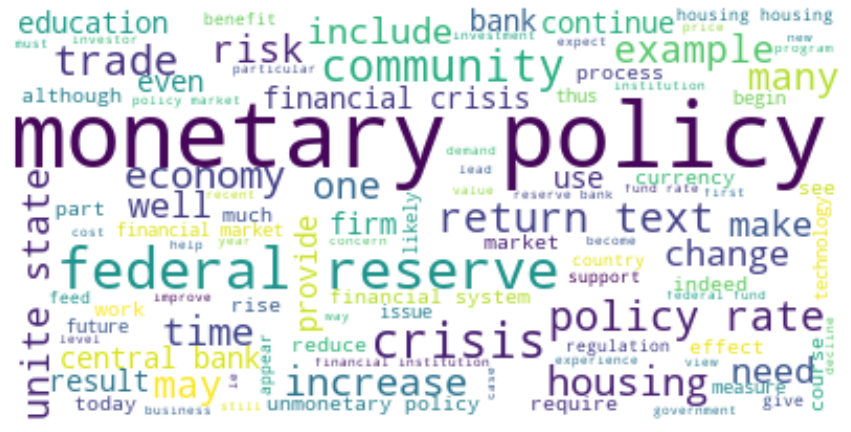

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Sentiment Analysis:

In [ ]:
text_body=[]

#for loop which appends the text to the text_body list
for i in range(0,len(fed_speeches_yellen)):
    temp_text=fed_speeches_yellen['text'].iloc[i]
    text_body.append(temp_text)

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
all = final_processed_text_new[0]
for i in range(1,len(final_processed_text_new)):
  all += final_processed_text_new[i]


In [ ]:
scores_all = sid.polarity_scores(all)

In [ ]:
scores_all

{'compound': 1.0, 'neg': 0.09, 'neu': 0.716, 'pos': 0.194}

In [ ]:
blob_all = TextBlob(all)
print(blob_all.sentiment)

Sentiment(polarity=0.08800176016587209, subjectivity=0.39692494963292485)


In [ ]:
scores_powell = sid.polarity_scores(powell)


In [ ]:
#bernanke
scores

{'compound': 1.0, 'neg': 0.07, 'neu': 0.784, 'pos': 0.145}

In [ ]:
scores_greenspan

{'compound': 1.0, 'neg': 0.072, 'neu': 0.781, 'pos': 0.147}

In [ ]:
scores_yellen

{'compound': 1.0, 'neg': 0.061, 'neu': 0.81, 'pos': 0.129}

In [ ]:
scores_powell

{'compound': 1.0, 'neg': 0.076, 'neu': 0.79, 'pos': 0.134}

In [ ]:
from textblob import TextBlob

In [ ]:
blob_bernanke = TextBlob(bernanke)
blob_greenspan = TextBlob(greenspan)
blob_yellen = TextBlob(yellen)
blob_powell = TextBlob(powell)

In [ ]:
print(format(blob_bernanke.sentiment))

Sentiment(polarity=0.1057406373594997, subjectivity=0.40419198934079975)


In [ ]:
print(format(blob_greenspan.sentiment))

Sentiment(polarity=0.104992894033153, subjectivity=0.4295659725325256)


In [ ]:
print(format(blob_yellen.sentiment))

Sentiment(polarity=0.10574098067673528, subjectivity=0.4043975318270391)


In [ ]:
print(format(blob_powell.sentiment))

Sentiment(polarity=0.12445344764223018, subjectivity=0.39895894821889016)


In [ ]:
#Sentiment Analysis per year

vader = []
blob = []
for year in range(1996, 2021):
  speech = fed_speeches[fed_speeches['year'] == year]
  text_body=[]

  for i in range(0,len(speech)):
    temp_text=speech['text'].iloc[i]
    text_body.append(temp_text)

  speech_text = text_body[0]
  for i in range(1,len(text_body)):
    speech_text += text_body[i]

  scores_year = sid.polarity_scores(speech_text)
  vader.append(scores_year)
  blob_year = TextBlob(speech_text)
  blob.append(blob_year.sentiment)
  print(year, scores_year, format(blob_year.sentiment), sep = "\n")

    


1996
{'neg': 0.079, 'neu': 0.77, 'pos': 0.151, 'compound': 1.0}
Sentiment(polarity=0.11268896334225892, subjectivity=0.4367489623192369)
1997
{'neg': 0.066, 'neu': 0.795, 'pos': 0.14, 'compound': 1.0}
Sentiment(polarity=0.10380132327497157, subjectivity=0.4279870669993372)
1998
{'neg': 0.084, 'neu': 0.779, 'pos': 0.137, 'compound': 1.0}
Sentiment(polarity=0.09241630909439716, subjectivity=0.42197127585019617)
1999
{'neg': 0.077, 'neu': 0.781, 'pos': 0.143, 'compound': 1.0}
Sentiment(polarity=0.11007218062175526, subjectivity=0.4335029659908128)
2000
{'neg': 0.064, 'neu': 0.792, 'pos': 0.144, 'compound': 1.0}
Sentiment(polarity=0.1251112006321872, subjectivity=0.4500102388435071)
2001
{'neg': 0.068, 'neu': 0.775, 'pos': 0.157, 'compound': 1.0}
Sentiment(polarity=0.10068394187677704, subjectivity=0.4269204548274671)
2002
{'neg': 0.073, 'neu': 0.772, 'pos': 0.156, 'compound': 1.0}
Sentiment(polarity=0.11277512749102302, subjectivity=0.4302546734821349)
2003
{'neg': 0.068, 'neu': 0.783, 'p

In [ ]:
neg_val = []
for i in range(len(vader)):
  neg_val.append(vader[i]['neg'])

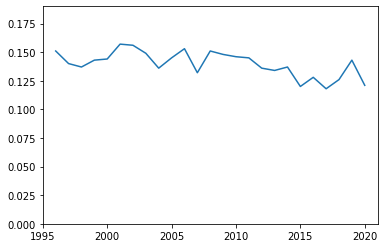

In [ ]:

plt.plot(range(1996, 2021), pos_val)
plt.axis([1995, 2021, 0, 0.19])
plt.show()

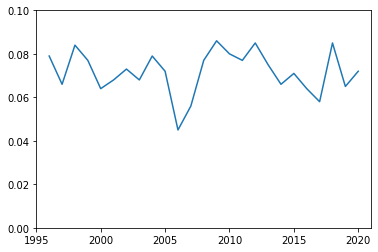

In [ ]:
plt.plot(range(1996, 2021), neg_val)
plt.axis([1995, 2021, 0, 0.1])
plt.show()

In [ ]:
polarity=[]
subjectivity = []
for i in range(len(blob)):
  polarity.append(blob[i].polarity)
  subjectivity.append(blob[i].subjectivity)

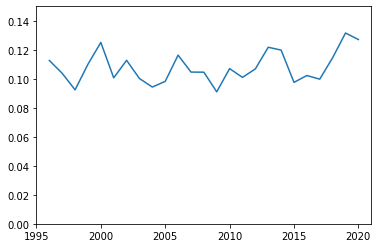

In [ ]:
plt.plot(range(1996, 2021), polarity)
plt.axis([1995, 2021, 0, 0.15])
plt.show()

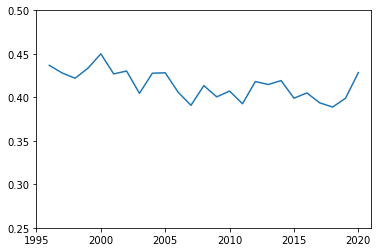

In [ ]:
plt.plot(range(1996, 2021), subjectivity)
plt.axis([1995, 2021, 0.25, 0.5])
plt.show()

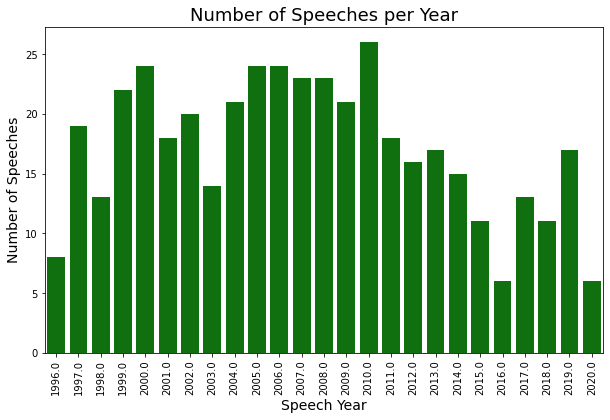

In [ ]:
import seaborn as sns

#EDA
#Speeches by Year
plt.figure(figsize = (10,6))
count_by_year = fed_speeches.groupby('year').count()['text'].reset_index()
sns.barplot(data = count_by_year, x = 'year', y = 'text', color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Speech Year', fontsize=14)
plt.ylabel('Number of Speeches', fontsize=14)
plt.title('Number of Speeches per Year', fontsize=18)

plt.show()

In [ ]:
import seaborn as sns

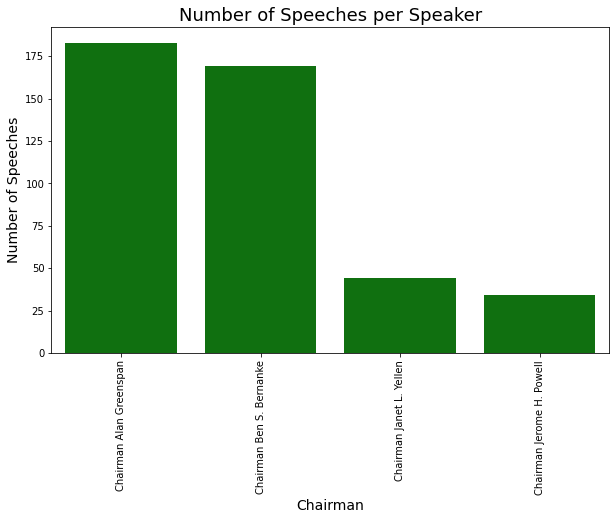

In [ ]:
#Speeches by Year
plt.figure(figsize = (10,6))
count_by_year = fed_speeches.groupby('speaker').count()['text'].reset_index()
sns.barplot(data = count_by_year, x = 'speaker', y = 'text', color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Chairman', fontsize=14)
plt.ylabel('Number of Speeches', fontsize=14)
plt.title('Number of Speeches per Speaker', fontsize=18)

plt.show()

In [ ]:
#Boxplots 
fed_speeches['polarity'] = fed_speeches['text'].apply(lambda x: TextBlob(x).polarity)
fed_speeches['subjectivity'] = fed_speeches['text'].apply(lambda x: TextBlob(x).subjectivity)

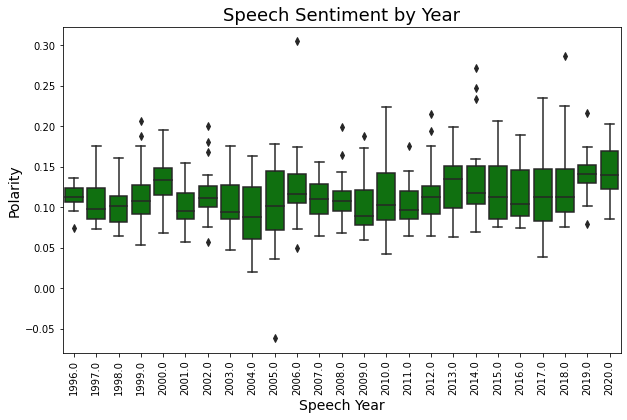

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=fed_speeches, x = 'year', y = 'polarity', color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Speech Year', fontsize=14)
plt.ylabel('Polarity', fontsize=14)
plt.title('Speech Sentiment by Year', fontsize=18)

plt.show()

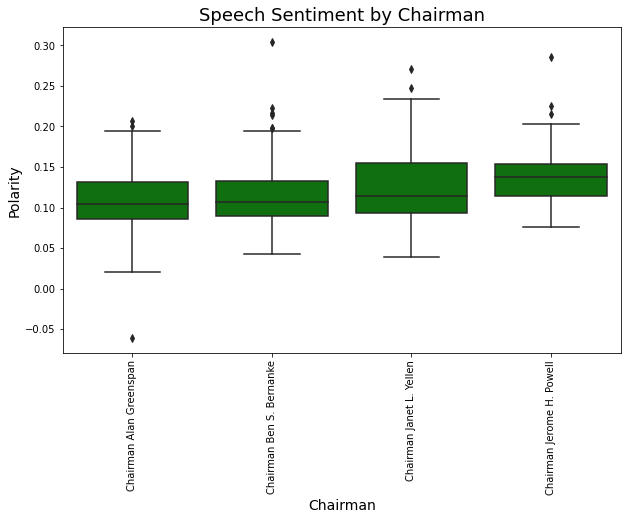

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=fed_speeches, x = 'speaker', y = 'polarity', color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Chairman', fontsize=14)
plt.ylabel('Polarity', fontsize=14)
plt.title('Speech Sentiment by Chairman', fontsize=18)

plt.show()

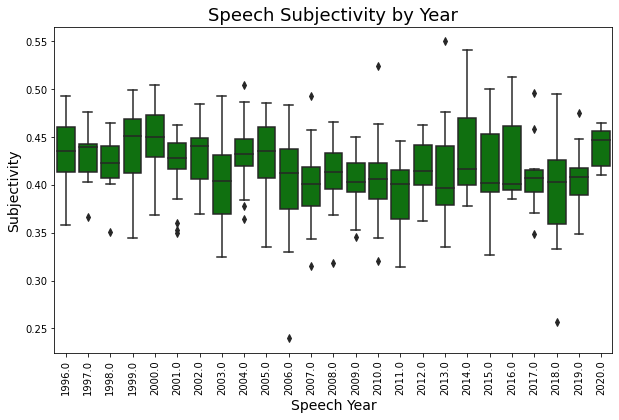

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=fed_speeches, x = 'year', y = 'subjectivity', color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Speech Year', fontsize=14)
plt.ylabel('Subjectivity', fontsize=14)
plt.title('Speech Subjectivity by Year', fontsize=18)

plt.show()

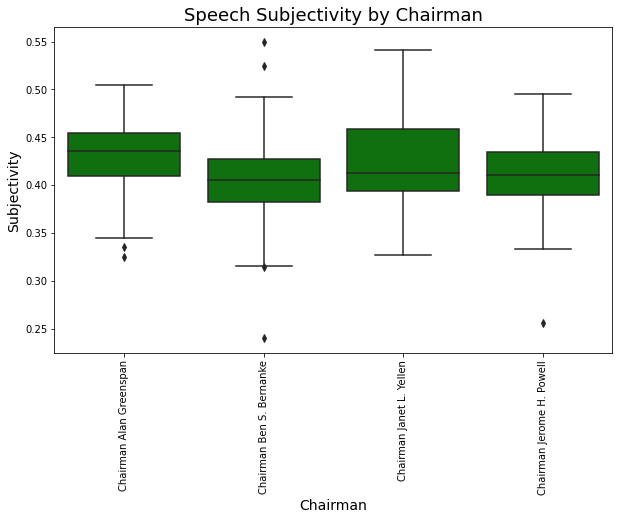

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=fed_speeches, x = 'speaker', y = 'subjectivity', color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Chairman', fontsize=14)
plt.ylabel('Subjectivity', fontsize=14)
plt.title('Speech Subjectivity by Chairman', fontsize=18)

plt.show()

In [ ]:
import seaborn as sns


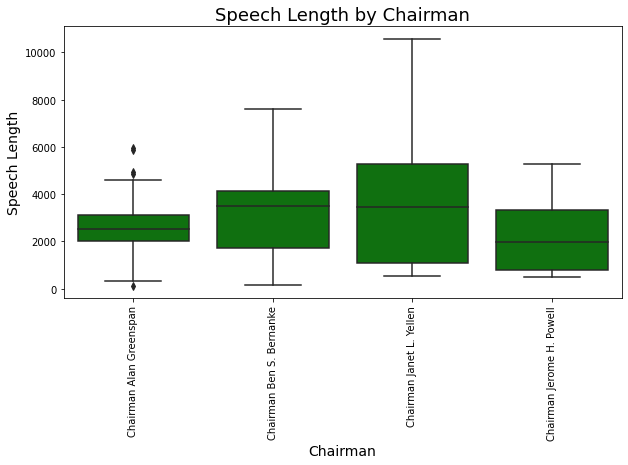

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=fed_speeches, x = 'speaker', y = 'text_len', color = 'green')
plt.xticks(rotation=90)
plt.xlabel('Chairman', fontsize=14)
plt.ylabel('Speech Length', fontsize=14)
plt.title('Speech Length by Chairman', fontsize=18)

plt.show()

In [ ]:
fed_speeches

link  ... text_len
0    https://www.federalreserve.gov/boarddocs/speec...  ...     2596
1    https://www.federalreserve.gov/boarddocs/speec...  ...     4344
2    https://www.federalreserve.gov/boarddocs/speec...  ...     5963
3    https://www.federalreserve.gov/boarddocs/speec...  ...     1690
4    https://www.federalreserve.gov/boarddocs/speec...  ...     1191
..                                                 ...  ...      ...
425  https://www.federalreserve.gov/newsevents/spee...  ...     5291
426  https://www.federalreserve.gov/newsevents/spee...  ...      521
427  https://www.federalreserve.gov/newsevents/spee...  ...      489
428  https://www.federalreserve.gov/newsevents/spee...  ...     1491
429  https://www.federalreserve.gov/newsevents/spee...  ...      919

[430 rows x 7 columns]